In [1]:
# Import the required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.dates import *

In [21]:
# Read the CSV file from the current working directory
fitness = pd.read_csv('daily_activity.csv',
                     parse_dates=['ActivityDate'])

# View the DataFrame
fitness.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

<AxesSubplot:xlabel='ActivityDate', ylabel='TotalSteps'>

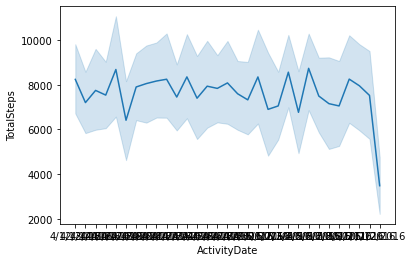

In [4]:
sns.lineplot(data=fitness, x='ActivityDate', y='TotalSteps')

  ActivityDate  TotalSteps
0   2016-04-12      271816
1   2016-04-13      237558
2   2016-04-14      255538
3   2016-04-15      248617
4   2016-04-16      277733


<AxesSubplot:xlabel='ActivityDate', ylabel='TotalSteps'>

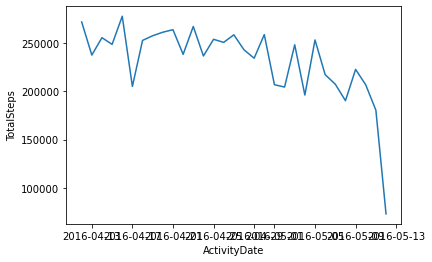

In [15]:
# Create a timeseries
steps_time_series = fitness.groupby('ActivityDate')[['TotalSteps']]\
.sum() \
.reset_index() \
.copy()

# Format data with the datetime() function
steps_time_series['ActivityDate'] = pd.to_datetime(steps_time_series['ActivityDate'])

# View the output
print(steps_time_series.head())

# Create a lineplot without the confidence level shade
sns.lineplot(x='ActivityDate', y='TotalSteps', data=steps_time_series)

/var/folders/nk/m613fynd7jb1413x2hnqtv6m0000gn/T/ipykernel_80888/3375242917.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation=45)


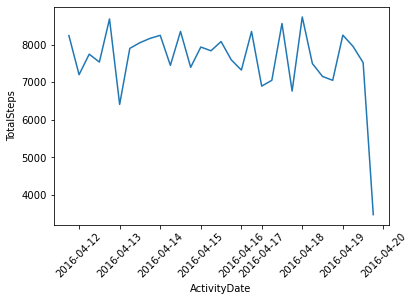

In [28]:
# Fix the labels
fig, ax = plt.subplots()
sns.lineplot(x='ActivityDate', 
             y='TotalSteps', 
             data=fitness, ci=None)
x_labels = fitness['ActivityDate'].dt.strftime('%Y-%m-%d')
ax.set_xticklabels(x_labels, rotation=45)
plt.show()
